Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


idx,text
0,"role in xxunk xxmaj brazil 's foreign trade policy . xxmaj the xxmaj ministry of xxmaj economy will be responsible for the : xxmaj supervision , control , regulation and execution of programmes and activities related to foreign trade . xxmaj application of trade defence mechanisms . xxmaj conduct of international trade , economic and financial negotiations with foreign governments and multilateral bodies . xxmaj development of the industrial ,"
1,"xxmaj section 232 measures against the xxup eu , xxmaj china , xxmaj canada and xxmaj mexico . xxmaj brazil is either a xxunk or a xxunk in the following xxup wto cases : xxup xxunk and xxup xxunk : the xxup eu and xxmaj japan questioned certain xxmaj brazilian measures concerning xxunk and xxunk in the xxunk , xxunk and technology industries . xxmaj the xxup ab report was"
2,xxmaj infrastructure xxmaj regulation ) ( xxup xxunk ) . xxmaj regulation ( xxup eu ) xxunk / 2012 on short selling and certain aspects of credit xxunk xxunk ( xxmaj short xxmaj selling xxmaj regulation ) . xxmaj regulation ( xxup eu ) 2015 / xxunk on transparency of securities financing transactions and of xxunk and amending xxmaj regulation ( xxup eu ) 648 / 2012 ( xxmaj securities
3,") . xxmaj also known as "" xxmaj xxunk , "" this statute deals with the clean - up of hazardous xxunk xxunk , as well as xxunk , xxunk , and other emergency releases of hazardous substances into the environment . xxup cercla imposes strict liability on parties connected to the disposal of hazardous substances , including : current and former owners and operators of land on which such"
4,children . xxmaj xxunk 4 of the xxmaj act enacts into domestic law xxmaj new xxmaj zealand 's obligations under the xxup hcch xxmaj convention on the xxmaj civil xxmaj aspects of xxmaj international xxmaj child xxmaj abduction 1980 ( xxmaj hague xxmaj child xxmaj abduction xxmaj convention ) . xxmaj xxunk xxmaj xxunk xxmaj act 1989 . xxmaj this provides for state intervention in respect of children in need


text,target
"xxbos xxfld 1 xxmaj what are the main xxunk in your jurisdiction ? xxmaj how are they protected ? xxfld 2 xxmaj full - term xxunk a xxunk xxunk its xxunk exclusive rights for a xxunk xxunk . xxmaj to be xxunk an xxunk must be ( section xxunk ) , xxmaj xxunk xxmaj act 1992 ( xxmaj xxunk xxmaj act ) ) all of the following : xxmaj xxunk",
"xxbos xxfld 1 xxmaj what have been the main developments in the last 12 months ? xxfld 2 xxmaj the xxunk market in the xxmaj united xxmaj arab xxmaj emirates ( xxup uae ) continues to xxunk xxunk , and all of key banking xxunk ( xxunk , deposits and non - xxunk xxunk ) xxunk to be xxunk in the right xxunk . xxmaj however , some xxunk remain",
xxbos xxfld 1 xxmaj what are the principal sources of law and regulation relating to xxunk and xxunk litigation ? xxfld 2 xxmaj the principal sources of law and regulation relating to xxunk and xxunk litigation are legislation and the decisions of the courts interpreting the legislation . xxmaj national legislation xxmaj the principal sources of national legislation in the xxup uk are the : xxmaj xxunk xxmaj act 1977,
"xxbos xxfld 1 xxmaj what legislation applies to xxunk ? xxfld 2 xxmaj xxunk xxmaj the xxmaj constitution of xxmaj india xxunk law - making powers between the central government ( that is , the federal government ) and the state governments . xxmaj the xxmaj constitution xxunk state governments exclusively to regulate all matters relating to xxunk and xxunk . xxmaj the xxmaj public xxmaj xxunk xxmaj act xxunk",
"xxbos xxfld 1 xxmaj what are the most common forms of security xxunk over xxunk and xxunk property ? xxmaj what formalities must the security xxunk , xxunk xxunk or xxunk comply with ? xxmaj what is the effect of non - compliance with these formalities ? xxfld 2 xxmaj xxunk property xxmaj common forms of security and formalities . xxmaj the most common forms of security taken over xxunk",


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,3.411402,3.004681,0.407068,00:00


epoch,train_loss,valid_loss,accuracy,time
0,2.599672,2.875135,0.426488,00:00
1,2.453304,2.766874,0.442188,00:00
2,2.273151,2.761039,0.444568,00:00
3,2.117391,2.787737,0.442411,00:00
4,1.975311,2.783314,0.444494,00:00


As a non-mathematician, I am somewhat as a child of the core communities of Gibraltar . This was what this 1976 international canadian union , Legislative Decree ( Title IV ) , of the Unmarried children et de il Involved ( 1984 ) . The 16


'    files = []\n\nlearn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5,\n                               metrics=[accuracy, Perplexity()],\n                               callback_fns=[partial(EarlyStoppingCallback, monitor="perplexity", mode="min", patience=3),\n                                             partial(SaveModelCallback, monitor="perplexity", mode="min", name="bestmodel")])\nlearn = learn.to_fp16()\nlearn.lr_find()\n\nlearn.recorder.plot(skip_end=5)\n\nlr = 5e-02\nmoms = (0.8, 0.7)\nwd=0.1\nlearn.fit_one_cycle(5, slice(lr), moms=moms, wd=wd)\nlearn.unfreeze()\nlearn.fit_one_cycle(1, slice(lr/2), moms=moms, wd=wd,\n                    callbacks=[SaveModelCallback(learn, monitor="perplexity", name="bestmodel"),\n                               ReduceLROnPlateauCallback(learn, monitor="perplexity", patience=5,\n                                                         min_delta=0.1, min_lr=1e-6)])\n learn.save_encoder(\'ft_enc\')                                      

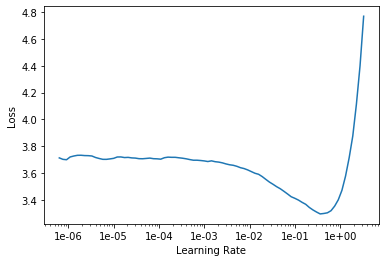

In [1]:
#!unzip "/content/drive/My Drive/data/google-quest-challenge.zip" -d "/content/drive/My Drive/data/google-quest-challenge"

%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.text import *
from fastai.tabular import *
from pathlib import Path
import numpy as np
import pandas as pd
from fastai.text import *
from fastai.callbacks import *
from google.colab import drive
drive.mount('/content/drive')
bs =64
path= Path("/content/drive/My Drive/data/qa")
train = pd.read_csv("/content/drive/My Drive/data/qa/legal_qa_train.csv")
test = pd.read_csv("/content/drive/My Drive/data/qa/legal_qa_test.csv")
#sub = pd.read_csv("/content/drive/My Drive/data/google-quest-challenge/sample_submission.csv")
train.head()
#preprocess
lm_df = train.append(test, ignore_index=True, sort=False)
np.random.seed(42)
lm_df = lm_df.iloc[np.random.permutation(len(train))]
cut = int(0.2 * len(lm_df)) +1
train_lm_df, valid_lm_df = lm_df[cut:], lm_df[:cut]
data_lm = TextLMDataBunch.from_df(path, train_lm_df, valid_lm_df, text_cols=["question", "answer"],
                                  mark_fields=True,
                                  bs=bs)
data_lm.show_batch()
data_lm.save('data_lm_export.pkl')
labels = train.columns[(train.columns.str.startswith("question_")) | 
                           (train.columns.str.startswith("answer_"))].to_list()
labels = list(filter(lambda x: x not in ['question',
                                         'question_category',
                                         'answer_jurisdiction',
                                         'answer'], labels))

#assert len(labels) == 30
data_clas = TextClasDataBunch.from_csv(path, "legal_qa_train.csv", test="legal_qa_test.csv",
                                       vocab=data_lm.train_ds.vocab, bs=bs,
                                       text_cols=["question", "answer"],
                                       mark_fields=True,
                                       label_cols=labels)
data_clas.show_batch(reverse=True)
data_clas.save('data_clas.pkl')
#fine tune LM
data_lm = load_data(path, 'data_lm_export.pkl', bs=bs)
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
#learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5,
                               #metrics=[accuracy, Perplexity()],
                               #callback_fns=[partial(EarlyStoppingCallback, monitor="perplexity", mode="min", patience=3),
                                             #partial(SaveModelCallback, monitor="perplexity", mode="min"), name='bestmodel'])
learn.save('bestmodel.pth')
learn = learn.to_fp16()
learn.lr_find()
learn.recorder.plot(skip_end=5)
learn.fit_one_cycle(1, 5e-2, moms=(0.8, 0.7))
learn.save('fit_head')
learn.load('fit_head');
#to complete fine-tuning, unfreeze and launch a new training
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3, moms=(0.8, 0.7)) #todo default 10
learn.save('fine_tuned')
learn.load('fine_tuned')                                                         
learn.export(file=Path("/content/drive/My Drive/data/qa/legal_qa_LSTM_export_v2.pkl"))
#print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))
print(learn.predict("As a non-mathematician, I am somewhat", n_words=50))
learn.save_encoder('fine_tuned_enc')
'''    files = []

learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5,
                               metrics=[accuracy, Perplexity()],
                               callback_fns=[partial(EarlyStoppingCallback, monitor="perplexity", mode="min", patience=3),
                                             partial(SaveModelCallback, monitor="perplexity", mode="min", name="bestmodel")])
learn = learn.to_fp16()
learn.lr_find()

learn.recorder.plot(skip_end=5)

lr = 5e-02
moms = (0.8, 0.7)
wd=0.1
learn.fit_one_cycle(5, slice(lr), moms=moms, wd=wd)
learn.unfreeze()
learn.fit_one_cycle(1, slice(lr/2), moms=moms, wd=wd,
                    callbacks=[SaveModelCallback(learn, monitor="perplexity", name="bestmodel"),
                               ReduceLROnPlateauCallback(learn, monitor="perplexity", patience=5,
                                                         min_delta=0.1, min_lr=1e-6)])
 learn.save_encoder('ft_enc')                                                        
 '''


In [0]:
+-+
3

print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

How do I secure a trademark? xxfld 2 The Russian Federation ( Russian Federation ) has a large number of commercial and trade secrets and information pages and is deemed to be the main trade mark in the country .
How do I secure a trademark? xxfld 2 The right to use the Brazilian Patent Office ( EC ) No . 28 / 2002 EC on trade marks in the Republic of Monaco ( Trademark
